<a href="https://colab.research.google.com/github/koojahyeok/pytorch_study/blob/main/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch

w = torch.tensor(1.0, requires_grad = True) #Autograd 자동 실행
a = w*3
b = a**2

In [15]:
b.backward()
print('b를 w로 미분한 값은 {}'.format(w.grad))

b를 w로 미분한 값은 18.0


In [16]:
import pickle
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


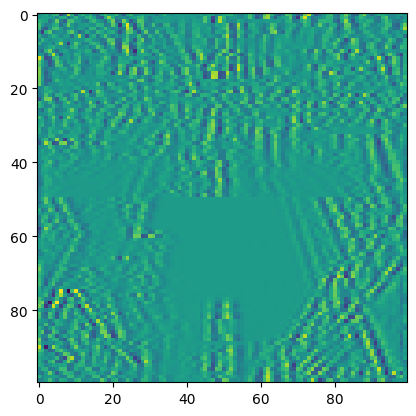

In [17]:
#이미지 shape
shp_original_img = (100, 100)

#오염된 이미지 파일 로딩
broken_image = torch.FloatTensor(pickle.load(open('/gdrive/My Drive/broken_image_t.p', 'rb'), encoding='latin1' ))

#matplotlib로 100, 100으로 바꾼 후 시각화
plt.imshow(broken_image.view(100,100))

In [18]:
def weird_function(x, n_iter=5):
    h = x

    #filt = tensor([-0.3333,  0.3333, -0.3333])
    filt = torch.tensor([-1./3, 1./3, -1./3])

    for i in range(n_iter):
        # zero_tensor = tensor([0.]) / zero_tensor.shape = torch.Size([1])
        zero_tensor = torch.tensor([1.0*0])

        # zero tensor와 input feature(h, 가상 feature)를 이어붙여 신규 h_l, h_r feature를 제작
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )

        # h_l과 h_r를 일정 비율로 결합하여 h를 업데이트
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r

        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:],h[:h.shape[0]//2]), 0)
            # 짝수 번 반복될때마다 신규 h feature의 앞뒤(5000을 기준)를 바꿔서 이어붙임(5000:) + (:5000)
    return h

In [19]:
def distance_loss(hypothesis, broken_image):
  return torch.dist(hypothesis, broken_image)

In [24]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [21]:
lr = 0.8

Loss at 0 = 12.11559772491455
Loss at 1000 = 1.1256011724472046
Loss at 2000 = 0.5576306581497192
Loss at 3000 = 0.3848915994167328
Loss at 4000 = 0.3024028539657593
Loss at 5000 = 0.2528451085090637
Loss at 6000 = 0.21787847578525543
Loss at 7000 = 0.19038155674934387
Loss at 8000 = 0.16716401278972626
Loss at 9000 = 0.1466183215379715
Loss at 10000 = 0.12785278260707855
Loss at 11000 = 0.11033333092927933
Loss at 12000 = 0.0937199667096138
Loss at 13000 = 0.0777859091758728
Loss at 14000 = 0.06237521022558212
Loss at 15000 = 0.047379035502672195
Loss at 16000 = 0.03272212669253349
Loss at 17000 = 0.02113182842731476
Loss at 18000 = 0.021165018901228905
Loss at 19000 = 0.021167268976569176


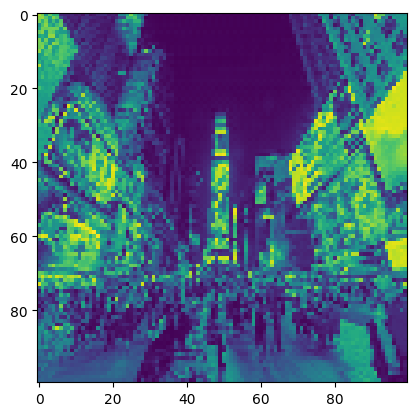

In [25]:
for i in range(0, 20000):
  random_tensor.requires_grad_(True)
  hypothesis = weird_function(random_tensor)
  loss = distance_loss(hypothesis, broken_image)
  loss.backward()
  with torch.no_grad():
    random_tensor = random_tensor - lr*random_tensor.grad
  if i % 1000 == 0:
    print('Loss at {} = {}'.format(i, loss.item()))

plt.imshow(random_tensor.view(100, 100).data)